<p style="text-align: center; font-size: 24px; font-weight: bold;">Email Marketing A/B Testing Project</p>


##### 1. Background

ABC eCommerce is a leading online retailer aiming to enhance its email marketing strategy to boost customer engagement and sales. The marketing team has identified three key areas to test and optimize through A/B testing. The goal is to determine the most effective email subject lines, promotional content, and understand the impact of previous customer engagement on revenue. By conducting these tests, ABC eCommerce aims to make data-driven decisions to improve their email marketing campaigns.


-------------

##### 2. **Hypotheses**

1. **Impact of Subject Type on Open Rates**
   - **H₀:** The type of email subject ('Product Highlight' vs. 'Gender Highlight') does not significantly affect open rates.

   - **H₁:** Emails with 'Gender Highlight' subjects have higher open rates compared to those with 'Product Highlight' subjects. 
   <br>
   <br>

2. **Influence of Body Content Promotion Type on Conversion Rates**
   - **H₀:** The type of promotional content ('Limited Time Discount', 'Present Offer Promotion', 'Lucky Draw Promotion') does not significantly affect conversion rates.

   - **H₁:** Certain promotional content types lead to higher conversion rates compared to others.
   <br>
   <br>

3. **Causal Effect of Previous Engagement Scores on Revenue**
   - **H₀:** Previous engagement scores do not influence the revenue generated from emails.
   
   - **H₁:** Higher previous engagement scores are positively correlated with increased revenue from emails.


#### **3. Sample Size Calculation Methodology**

**Hypothesis 1: Impact of Subject Type on Open Rates**

![Alt Text](data/H1.png)

    
**Hypothesis 2: Influence of Body Content Promotion Type on Conversion Rates**

![Alt Text](data/H2.png)

    
**Hypothesis 3: Causal Effect of Previous Engagement Scores on Revenue**

![Alt Text](data/H3.png)

##### Maximum Required Sample Size

- **Highest Required Sample Size:** 25,000 emails (for Hypothesis 1)

-------------------

#####  **4. Running Campaign**

Given the sample size calculations, we used the maximum required number of emails to perform all three tests. Therefore, we performed the tests using 25,000 emails for each hypothesis. This ensured that we had sufficient sample sizes to detect meaningful differences and draw reliable conclusions.

**Campaign Duration:**

- We ran the email campaign for a period of 3 weeks. This duration allowed us to gather enough data to ensure the reliability and robustness of the results.

**Random Assignment:**

- Emails were randomly assigned to different groups to ensure unbiased distribution. Randomization was performed using a random number generator to assign each email to a specific group for each hypothesis.

**Avoiding Confounding Effects:**

- **Stratification:** We stratified the email list based on key demographics (e.g., age, gender, location) to ensure balanced representation across all groups.

- **Control Variables:** We controlled for potential confounding variables such as time of day and day of the week by ensuring that emails were sent at various times and days across all groups.

- **Statistical Controls:** In the analysis phase, we will use regression models to control for any remaining confounding variables, ensuring that the observed effects were due to the tested factors.

By using 25,000 emails, running the campaign for 3 weeks, and implementing robust randomization and control measures, we effectively tested the impact of subject type on open rates, the influence of body content promotion type on conversion rates, and the causal effect of previous engagement scores on revenue. This approach allowed us to optimize our email marketing strategy based on robust, data-driven insights.

----

#### **5. Data Loading and Preparation**

In [1]:
#importing basic libraries
import pandas as pd
import numpy as np

In [2]:
#loading the dataset
df = pd.read_csv("../data/email_campaigns_data.csv")

In [3]:
df.head()

,Email_ID,Customer_ID,Segment,Device_Type,Subject_Type,Body_Content_Type,Gender,Location,Previous_Engagement,Opened,TimeStamp_Send,TimeStamp_Open,Clicked,Purchased,Unsubscribed,Delivery_Status,Revenue
0,1,7271,New Customer,Mobile,Gender Specific Title,Limited Time Discount,Female,Mandalay,43.41,False,9/6/2023 7:53,NaN,False,False,False,Delivered,0.0
1,2,861,Returning Customer,Mobile,Product Specific Title,Limited Time Discount,Male,Pegu,53.81,True,10/14/2023 0:24,10/14/2023 13:34,False,False,False,Open,0.0
2,3,5391,New Customer,Mobile,Gender Highlight,Present Offer Promotion,Female,Yangon,30.11,False,2/9/2023 19:19,NaN,False,False,False,Delivered,0.0
3,4,5192,New Customer,Desktop,Product Specific Title,Limited Time Discount,Male,Monywa,23.84,False,3/26/2023 21:51,NaN,False,False,False,Delivered,0.0
4,5,5735,Returning Customer,Mobile,Product Highlight,Limited Time Discount,Male,Mandalay,22.37,False,10/6/2023 1:47,NaN,False,False,False,Delivered,0.0


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 Email_ID                   0
Customer_ID                0
Segment                    0
Device_Type                0
Subject_Type               0
Body_Content_Type          0
Gender                     0
Location                   0
Previous_Engagement        0
Opened                     0
TimeStamp_Send             0
TimeStamp_Open         18756
Clicked                    0
Purchased                  0
Unsubscribed               0
Delivery_Status            0
Revenue                    0
dtype: int64


In [5]:
# setting the timestamp to datetime format
df['TimeStamp_Open'] = pd.to_datetime(df['TimeStamp_Open'], errors='coerce')
df['TimeStamp_Send'] = pd.to_datetime(df['TimeStamp_Send'], errors='coerce')

In [6]:
# fill the missing values with a placeholder date
df['TimeStamp_Open'] = df['TimeStamp_Open'].fillna(pd.Timestamp('1970-01-01'))
print("Missing Values After Cleaning:\n", df.isnull().sum())

Missing Values After Cleaning:
 Email_ID               0
Customer_ID            0
Segment                0
Device_Type            0
Subject_Type           0
Body_Content_Type      0
Gender                 0
Location               0
Previous_Engagement    0
Opened                 0
TimeStamp_Send         0
TimeStamp_Open         0
Clicked                0
Purchased              0
Unsubscribed           0
Delivery_Status        0
Revenue                0
dtype: int64


In [7]:
# Define Weekday and Weekend
df['Day_Type'] = df['TimeStamp_Send'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

In [8]:
# Extract hour from TimeStamp_Open column
df['Hour'] = df['TimeStamp_Send'].dt.hour

# Define time periods based on hours of the day
time_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
conditions = [
    (df['Hour'] >= 6) & (df['Hour'] < 12),  # Morning: 6 AM to 12 PM
    (df['Hour'] >= 12) & (df['Hour'] < 16), # Afternoon: 12 PM to 6 PM
    (df['Hour'] >= 16) & (df['Hour'] < 19), # Evening: 6 PM to 9 PM
    (df['Hour'] >= 19) | (df['Hour'] < 6)   # Night: 9 PM to 6 AM
]

df['Time_Period'] = np.select(conditions, time_periods, default='Unknown')

**- Data Consistency Check**


In [9]:
# analysis/DataConsistency_Check.ipynb

# Check unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    print(f'Unique values in {col}: {df[col].unique()}')
    print('\n')

# Example: Standardize 'Device_Type' entries
df['Device_Type'] = df['Device_Type'].str.strip().str.title()

# Verify changes
print(df['Device_Type'].unique())

Unique values in Segment: ['New Customer' 'Returning Customer' 'VIP']


Unique values in Device_Type: ['Mobile' 'Desktop' 'Tablet']


Unique values in Subject_Type: ['Gender Specific Title' 'Product Specific Title' 'Gender Highlight'
 'Product Highlight']


Unique values in Body_Content_Type: ['Limited Time Discount' 'Present Offer Promotion' 'Lucky Draw Promotion']


Unique values in Gender: ['Female' 'Male']


Unique values in Location: ['Mandalay' 'Pegu' 'Yangon' 'Monywa' 'Lashio' 'Sagaing' 'Taungoo']


Unique values in Delivery_Status: ['Delivered' 'Open' 'Spam' 'Deferred' 'Bounced']


Unique values in Day_Type: ['Weekday' 'Weekend']


Unique values in Time_Period: ['Morning' 'Night' 'Evening' 'Afternoon']


['Mobile' 'Desktop' 'Tablet']


- In the subject title, there are four categories: 'Product Specific Title', 'Product Highlight', 'Gender Highlight', and 'Gender Specific Title'. 

- To simplify our analysis, we will summarize these into two categories: 'Product Highlighted Subject' for both 'Product Specific Title' and 'Product Highlight', 

- and 'Gender Highlighted Subject' for both 'Gender Highlight' and 'Gender Specific Title'. This will help reduce complexity and improve clarity in our data analysis.

In [10]:
df['Subject_Type'] = df['Subject_Type'].replace({
    'Product Specific Title': 'Product Highlighted Subject',
    'Product Highlight': 'Product Highlighted Subject',
    'Gender Highlight': 'Gender Highlighted Subject',
    'Gender Specific Title': 'Gender Highlighted Subject'
})


**- Data Aggregation**


In [11]:
# Convert boolean columns to integers
boolean_columns = df.select_dtypes(include='bool').columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [12]:
# Group by categorical columns and aggregate numeric columns
aggregated_df = df.groupby(['Segment', 'Device_Type', 'Subject_Type', 'Body_Content_Type', 'Gender', 'Location', 'Day_Type', 'Time_Period']).agg({
    'Opened': 'sum',
    'Clicked': 'sum',
    'Purchased': 'sum',
    'Unsubscribed': 'sum',
    'Revenue': 'sum'
}).reset_index()

aggregated_df.head()

,Segment,Device_Type,Subject_Type,Body_Content_Type,Gender,Location,Day_Type,Time_Period,Opened,Clicked,Purchased,Unsubscribed,Revenue
0,New Customer,Desktop,Gender Highlighted Subject,Limited Time Discount,Female,Lashio,Weekday,Morning,1,0,0,0,0.0
1,New Customer,Desktop,Gender Highlighted Subject,Limited Time Discount,Female,Lashio,Weekday,Night,0,0,0,0,0.0
2,New Customer,Desktop,Gender Highlighted Subject,Limited Time Discount,Female,Lashio,Weekend,Evening,1,0,0,0,0.0
3,New Customer,Desktop,Gender Highlighted Subject,Limited Time Discount,Female,Lashio,Weekend,Morning,1,0,0,0,0.0
4,New Customer,Desktop,Gender Highlighted Subject,Limited Time Discount,Female,Lashio,Weekend,Night,1,0,0,0,0.0


#### **6. Exploratory Data Analysis (EDA)**

- EDA is crucial in A/B testing because it helps to understand the data better, identify any issues, and uncover patterns that might affect our results. 

- Even if some variables aren't directly related to our hypothesis, EDA ensures our analysis is thorough and reliable, providing valuable insights for better decision-making.

- **Customer Segments Distribution**


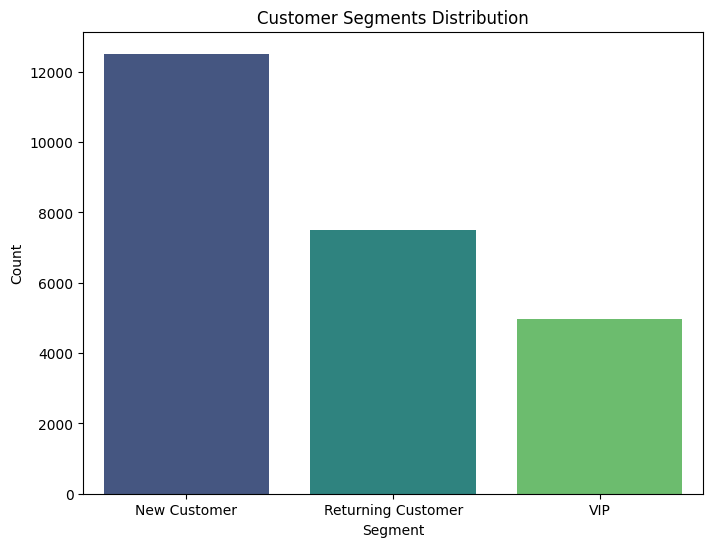

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Segment', hue='Segment', palette='viridis', legend=False)
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

The chart shows that most of our audience are new customers, with a good number of returning customers and a smaller group of VIPs. This means we should focus on welcoming and converting new customers into returning customers, keeping our returning customers engaged, and making our VIPs feel special and valued.

- **Revenue by Location**

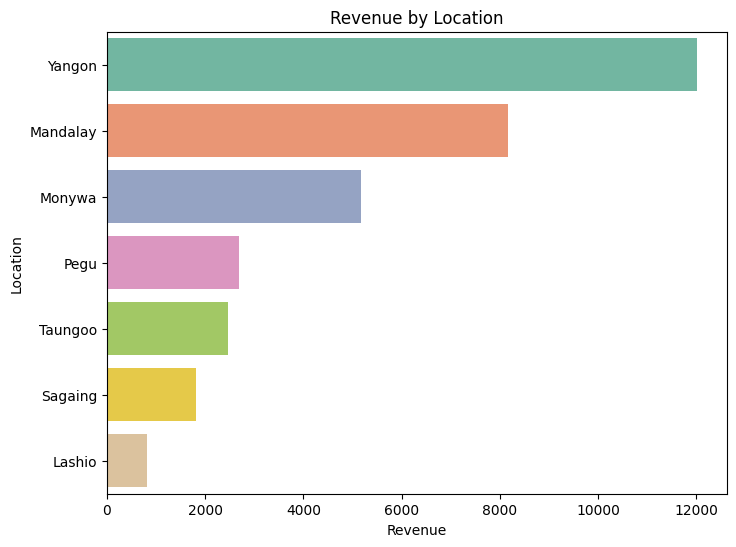

In [14]:
# Revenue by Location
ctr = df.groupby('Location')['Revenue'].sum().reset_index()
ctr = ctr.sort_values(by='Revenue', ascending=False)  # Sort by Revenue
plt.figure(figsize=(8,6))
sns.barplot(data=ctr, x='Revenue', y='Location', hue='Location', palette='Set2', legend=False)  # Show as vertical bar chart
plt.title('Revenue by Location')
plt.xlabel('Revenue')
plt.ylabel('Location')
plt.show()

Yangon generates the highest revenue, followed by Mandalay and Monywa. This suggests focusing marketing efforts and resources on these top-performing locations to maximize revenue, while also exploring strategies to increase sales in lower-revenue areas like Taungoo and Lashio.

- **Open Rate by Device Type**

<Figure size 800x600 with 0 Axes>

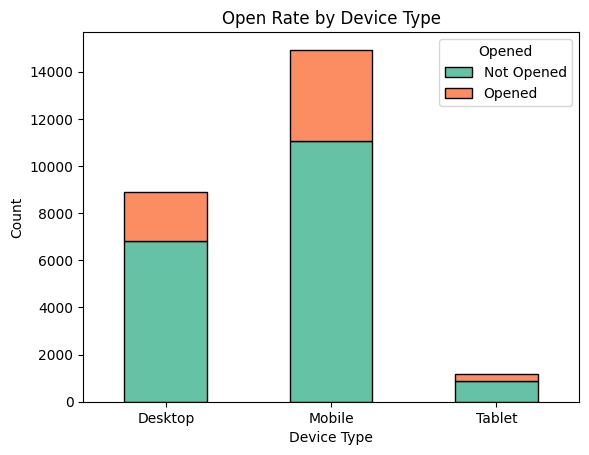

In [15]:
plt.figure(figsize=(8,6))
open_rate_by_device = df.groupby('Device_Type')['Opened'].value_counts().unstack().fillna(0)
open_rate_by_device.plot.bar(stacked=True, color=sns.color_palette('Set2'), edgecolor='black')
plt.title('Open Rate by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Opened', labels=['Not Opened', 'Opened'])
plt.show()

Emails are most frequently opened on mobile devices. This suggests that optimizing email campaigns for mobile users will maximize engagement, but we also need to ensure a good experience for desktop users.

- **Delivery Status Distribution**

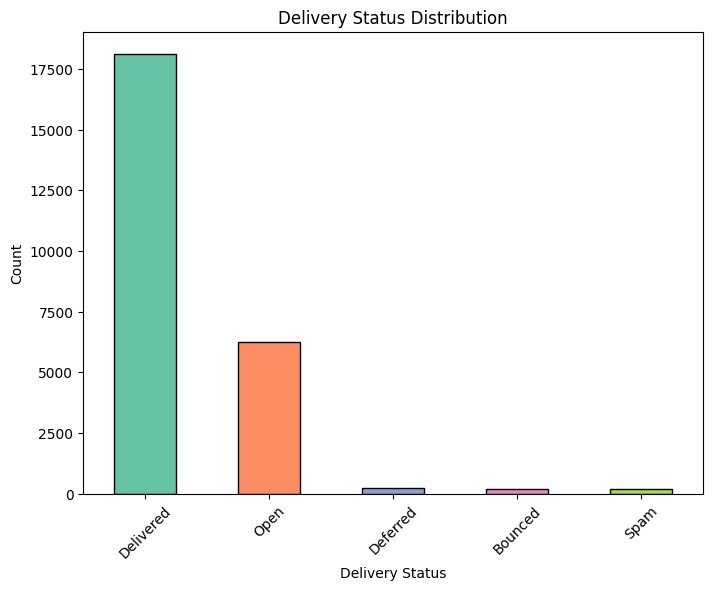

In [16]:
plt.figure(figsize=(8,6))
delivery_status_counts = df['Delivery_Status'].value_counts()
delivery_status_counts.plot.bar(color=sns.color_palette('Set2'), edgecolor='black')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

 While most emails are successfully delivered, a significant portion remains unopened, and a small number end up as spam. 
 
 Though we have limited control over deferred and bounced emails, we can focus on reducing the number of emails marked as spam by improving email content, ensuring compliance with spam regulations, and using best practices for email authentication and sender reputation. This can help increase the overall effectiveness of our email campaigns.

- **Click Through Rate by Gender**


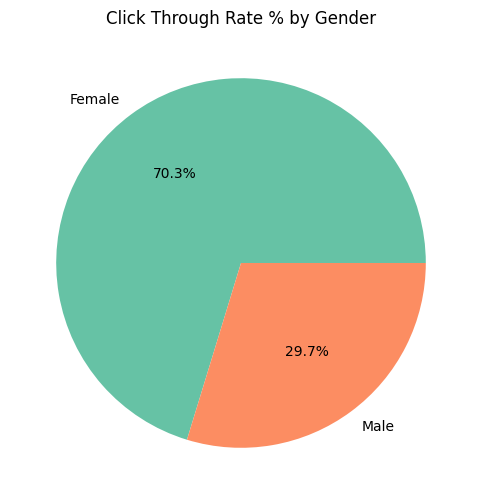

In [17]:
plt.figure(figsize=(8,6))
click_through_rate = df.groupby('Gender')['Clicked'].sum().reset_index()
plt.pie(click_through_rate['Clicked'], labels=click_through_rate['Gender'], autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Click Through Rate % by Gender')
plt.show()

Females are much more engaged with the email campaign. To improve results, we should keep females highly engaged while also creating strategies to get more males interested and active.

---------------------

#### **7. Hypothesis 1: Impact of Subject Type on Open Rates**

**Hypothesis**


- H₀: The type of email subject ('Product Highlight' vs. 'Gender Highlight') does not significantly affect open rates.

- H₁: Emails with 'Gender Highlight' subjects have higher open rates compared to those with 'Product Highlight' subjects.

**Dataset**

- We have two different data: original df and aggregated_df. 

- Open rates are typically measured at the individual email level. We need to analyze the open rates for each email to determine if the subject type has a significant impact.

Therefore, fot this hypothesis, we are going to use original df.

**Methodology**

To accurately assess the impact of subject type on open rates, we are going to use the following two methods:

- **Chi-Square Test:** Offers a straightforward analysis of the association between subject type and open rates without considering other variables.

- **Logistic Regression:** As the dependent variable is binary (0 for not open, 1 for open), we will use Logistic Regression because it is ideal for binary outcomes. It models the probability of the event occurring (email being opened) and adjusts for confounders to ensure the observed relationship is not influenced by other factors.

##### **7.1 Chi-Square Test**

In [18]:
# analysis/Email Marketing_V5.ipynb

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['Subject_Type'], df['Opened'])

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi2: {chi2}, p-value: {p}')

Chi2: 30.202891390788302, p-value: 3.8912891364747595e-08


According to the above output, the p-value (3.89e-08) is much smaller than the common significance level (α = 0.05).

This means we reject the null hypothesis (H₀) that the type of email subject ('Product Highlight' vs. 'Gender Highlight') does not significantly affect open rates.

- Simply to say, **the type of email subject line significantly impacts the open rates of emails.**

Additionally, the Chi-Square statistic of 30.2 indicates a strong association between the subject type and open rates.

As the Chi-Square test confirms the existence of an association, it is time to explore OLS regression provides more insights.

##### **7.2 Logistic Regression**

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns


# Fit the logistic regression model
logit_model = smf.logit('Opened ~ C(Subject_Type) + C(Segment) + C(Device_Type) + C(Location) + C(Day_Type) + C(Time_Period)', data=df).fit()
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.560433
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Opened   No. Observations:                25000
Model:                          Logit   Df Residuals:                    24984
Method:                           MLE   Df Model:                           15
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                0.002915
Time:                        12:31:41   Log-Likelihood:                -14011.
converged:                       True   LL-Null:                       -14052.
Covariance Type:            nonrobust   LLR p-value:                 3.114e-11
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                           

To be easier to understand, let's see with visuals

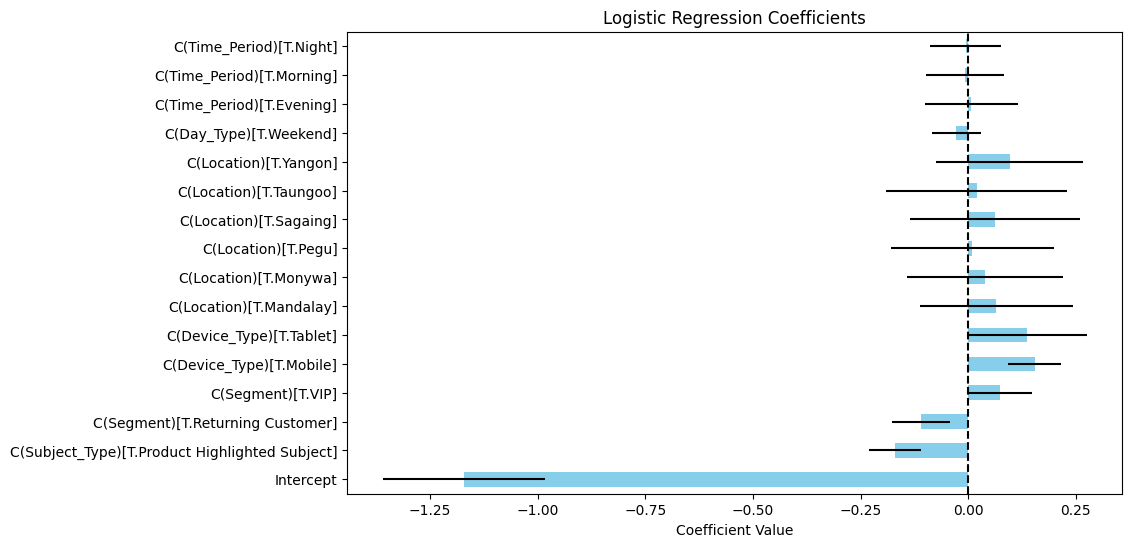

In [20]:
import matplotlib.pyplot as plt

# Extract coefficients and confidence intervals
coefficients = logit_model.params
conf = logit_model.conf_int()
conf['Coefficient'] = coefficients
conf.columns = ['Lower CI', 'Upper CI', 'Coefficient']

# Plot
plt.figure(figsize=(10, 6))
conf['Coefficient'].plot(kind='barh', xerr=(conf['Upper CI'] - conf['Lower CI']) / 2, color='skyblue')
plt.title('Logistic Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

**Key Findings from Logistic Regression**

- **C(Subject_Type)[T.Product Highlighted Subject] (-0.1696, p < 0.001):** Emails with 'Product Highlighted Subject' lines have significantly lower open rates compared to 'Gender Highlighted Subject' lines.

  - **Interpretation:** 'Gender Highlighted Subject' performs better in terms of open rates.

**Additional Important Insights from Logistic Regression**

The following insights, while not directly related to Hypothesis 1, provide valuable information for our business:

1. **Customer Segment:**
   - **Returning Customer (-0.1096, p = 0.001):** Returning customers have significantly lower open rates compared to new customers.
     - **Action:** Explore more engaging or personalized content for returning customers.
   - **VIP (0.0745, p = 0.051):** VIP customers have slightly higher open rates compared to new customers, though this result is marginally significant.
     - **Action:** Enhance engagement strategies for VIPs.

2. **Device Type:**
   - **Mobile (0.1548, p < 0.001):** Emails opened on mobile devices have significantly higher open rates compared to desktop devices.
     - **Action:** Optimize email content for mobile devices.
   - **Tablet (0.1362, p = 0.056):** Emails opened on tablets have higher open rates compared to desktop devices, but this result is marginally significant.
     - **Action:** Improve the user experience for tablet users.

3. **Geographical Influence:**
   - **Yangon (0.0961, p = 0.272):** Positive effect but not significant.
     - **Action:** Investigate customer behavior in Yangon for more effective campaigns.
   - **Other Locations:** No significant effects.
     - **Action:** Explore localized strategies for other locations.

4. **Time of Day:**
   - **Evening (0.0073, p = 0.894), Morning (-0.0077, p = 0.869), Night (-0.0060, p = 0.887):** No significant effects.
     - **Action:** Flexible scheduling is possible.

5. **Day Type:**
   - **Weekend (-0.0277, p = 0.344):** No significant difference from weekdays.
     - **Action:** Flexible scheduling is possible.

These insights, while not directly related to Hypothesis 1, provide valuable information that can help optimize our email marketing strategy.

-------------------

#### **8. Hypothesis 2: Influence of Body Content Promotion Type on Conversion Rates**

**Hypothesis**

- H₀: The type of promotional content ('Limited Time Discount', 'Present Offer Promotion', 'Lucky Draw Promotion') does not significantly affect conversion rates.

- H₁: Certain promotional content types lead to higher conversion rates compared to others.

**Dataset**

- Conversion rates can be aggregated to compare the effectiveness of different promotional content types. 

- Aggregating the data allows us to summarize the conversion rates for each type of promotion and perform statistical tests on these summaries.

Therefore, for this hypothesis, aggregated_df will be used.

**Methodology**

To accurately assess the impact of body content promotion type on conversion rates, we need to consider the nature of our data and the number of variables involved.

**Choosing the Right Test**

Since we are comparing more than two groups (three types of promotional content), we need a test that can handle multiple categories. 
Two common choices are:
- ANOVA (Analysis of Variance): A parametric test that compares means across multiple groups. It assumes that the data is normally distributed and the variances are equal across groups.

- Kruskal-Wallis Test: A non-parametric alternative to ANOVA that compares medians across multiple groups. It does not assume normality or equal variances.

To decide between these tests, we first need to check the normality of our purchase data.

##### **8.1 Normality Test**

We can use the Shapiro-Wilk test to assess the normality of the purchase data. If the p-value is greater than 0.05, we fail to reject the null hypothesis of normality, and we can consider the data as normally distributed.

In [21]:
from scipy.stats import shapiro
import warnings

# Check normality for aggregated_df
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=UserWarning)
    
    shapiro_test = shapiro(aggregated_df['Purchased'])
    print(f'Shapiro-Wilk test: W={shapiro_test[0]}, p-value={shapiro_test[1]}')
    if shapiro_test[1] > 0.05:
        print('Data is normally distributed.')
    else:
        print('Data is not normally distributed.')

Shapiro-Wilk test: W=0.20840620319927194, p-value=1.2257891730440385e-83
Data is not normally distributed.


According to the above output, the extremely low p-value suggests that our purchase data is not normally distributed. 

Therefore, we should use the non-parametric Kruskal-Wallis test.

##### **8.2 Kruskal-Wallis Test**

The Kruskal-Wallis test will tell us if there is a significant difference in purchase rates across the different body content types.

In [22]:
from scipy.stats import kruskal

group1 = aggregated_df[aggregated_df['Body_Content_Type'] == 'Limited Time Discount']['Purchased']
group2 = aggregated_df[aggregated_df['Body_Content_Type'] == 'Present Offer Promotion']['Purchased']
group3 = aggregated_df[aggregated_df['Body_Content_Type'] == 'Lucky Draw Promotion']['Purchased']

stat, p = kruskal(group1, group2, group3)
print(f'Kruskal-Wallis H-Test Statistic: {stat}, p-value: {p}')

Kruskal-Wallis H-Test Statistic: 49.29553990993267, p-value: 1.9751929069102076e-11


The low p-value indicates a significant difference in purchase rates across the different body content types. However, the Kruskal-Wallis test does not tell us which specific groups differ. Therefore, let's go with a post-hoc test.

##### **8.3 Post-Hoc Test (Dunn's Test)**

Dunn's test is a post-hoc test for the Kruskal-Wallis test. It performs pairwise comparisons between the groups while controlling for the family-wise error rate.

In [23]:
import scikit_posthocs as sp
import pandas as pd

data = aggregated_df[['Body_Content_Type', 'Purchased']]
dunn_test = sp.posthoc_dunn(data, val_col='Purchased', group_col='Body_Content_Type', p_adjust='bonferroni')

print(dunn_test)

                         Limited Time Discount  Lucky Draw Promotion  \
Limited Time Discount             1.000000e+00          1.000000e+00   
Lucky Draw Promotion              1.000000e+00          1.000000e+00   
Present Offer Promotion           1.182391e-09          9.134458e-08   

                         Present Offer Promotion  
Limited Time Discount               1.182391e-09  
Lucky Draw Promotion                9.134458e-08  
Present Offer Promotion             1.000000e+00  


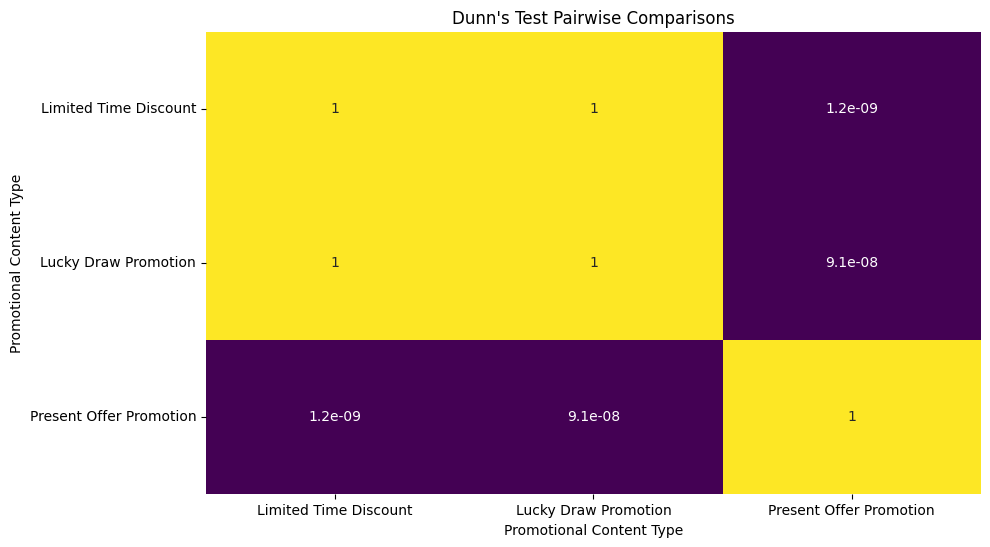

In [24]:
# Visualize Dunn's test results
plt.figure(figsize=(10, 6))
sns.heatmap(dunn_test, annot=True, cmap='viridis', cbar=False)
plt.title('Dunn\'s Test Pairwise Comparisons')
plt.xlabel('Promotional Content Type')
plt.ylabel('Promotional Content Type')
plt.show()

The output from Dunn's test provides pairwise comparisons between the different body content types, with p-values adjusted using the Bonferroni correction.

According to the above output, we can summarize as:

 - **Present Offer Promotion** is significantly more effective in driving purchases compared to both 'Limited Time Discount' and 'Lucky Draw Promotion'. ( very low p-value compared to others)

- There is no significant difference between 'Limited Time Discount' and 'Lucky Draw Promotion' in terms of purchase rates.

##### **8.4 Poisson Regression**

To gain a more comprehensive understanding of the impact of different body content types on purchase rates, we can use Poisson regression. This is particularly suitable for our data because:
- The response variable (Purchased) is a count.

- We want to control for other variables that might influence purchase rates (e.g., Segment, Device_Type, Location).

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

poisson_model = smf.poisson('Purchased ~ C(Body_Content_Type) + C(Segment) + C(Device_Type) + C(Location) + C(Day_Type) + C(Time_Period)', data=aggregated_df).fit()
print(poisson_model.summary())

Optimization terminated successfully.
         Current function value: 0.172833
         Iterations 7
                          Poisson Regression Results                          
Dep. Variable:              Purchased   No. Observations:                 3835
Model:                        Poisson   Df Residuals:                     3818
Method:                           MLE   Df Model:                           16
Date:                Fri, 27 Sep 2024   Pseudo R-squ.:                  0.1333
Time:                        12:31:42   Log-Likelihood:                -662.82
converged:                       True   LL-Null:                       -764.73
Covariance Type:            nonrobust   LLR p-value:                 1.330e-34
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
Intercept                         

Let's see as visual:

Optimization terminated successfully.
         Current function value: 0.172833
         Iterations 7


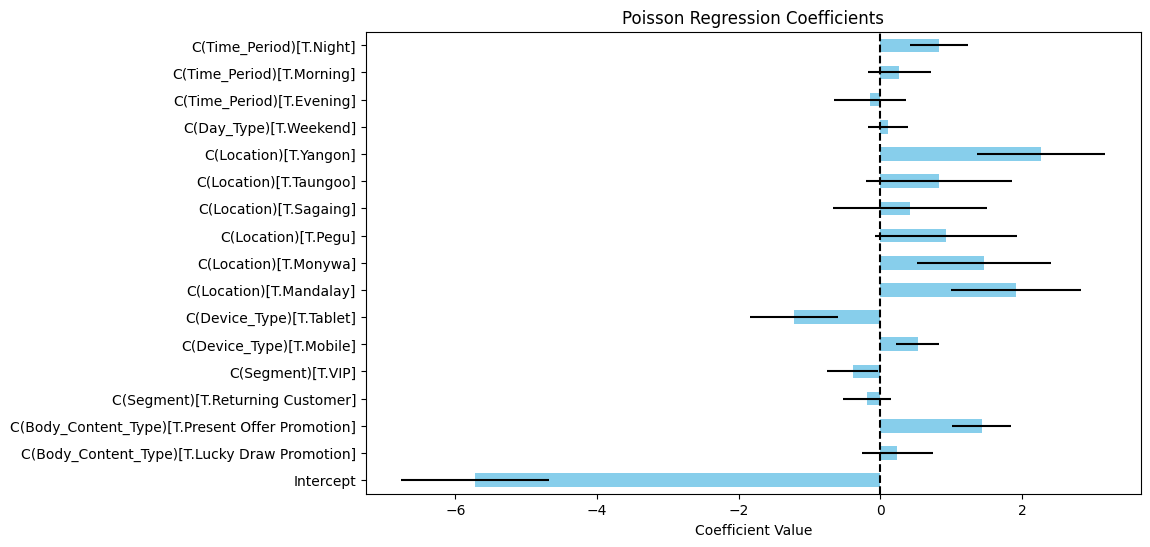

In [26]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Fit the Poisson regression model
poisson_model = smf.poisson('Purchased ~ C(Body_Content_Type) + C(Segment) + C(Device_Type) + C(Location) + C(Day_Type) + C(Time_Period)', data=aggregated_df).fit()

# Extract coefficients and confidence intervals
coefficients = poisson_model.params
conf = poisson_model.conf_int()
conf['Coefficient'] = coefficients
conf.columns = ['Lower CI', 'Upper CI', 'Coefficient']

# Plot
plt.figure(figsize=(10, 6))
conf['Coefficient'].plot(kind='barh', xerr=(conf['Upper CI'] - conf['Lower CI']) / 2, color='skyblue')
plt.title('Poisson Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

The Poisson regression results provide a more nuanced understanding of the impact of body content types on purchase rates, while controlling for other relevant factors.

**Key Findings from Poisson Regression**

The Poisson regression results approve the following facts:

- **Present Offer Promotion**: This type of promotional content significantly increases the purchase rate compared to the baseline ('Limited Time Discount'). We should consider using more 'Present Offer Promotion' content in our emails to drive conversions.

- **Lucky Draw Promotion**: This type of content does not significantly affect the purchase rate compared to the baseline. We may want to reconsider the use of 'Lucky Draw Promotion' or find ways to make it more appealing to our customers.

**Additional Important Insights from Poisson Regression**

Though the following facts are not directly related to the main hypothesis, these insights will be valuable for business decisions:

1. **Customer Segment:**
   - **Returning Customer:** No significant difference in purchase rates compared to 'New Customer' (p = 0.267).
     - **Action:** Explore new tactics to better engage this segment.
   - **VIP:** Significantly lower purchase rates compared to 'New Customer' (p = 0.033).
     - **Action:** Tailor campaigns to better meet VIP preferences.

2. **Device Type:**
   - **Mobile:** Higher purchase rates (p = 0.001).
     - **Action:** Optimize email content for mobile devices.
   - **Tablet:** Lower purchase rates (p < 0.001).
     - **Action:** Investigate and improve user experience on tablets.

3. **Geographical Influence:**
   - **Yangon:** Strong positive effect on purchase rates (p < 0.001).
     - **Action:** Focus marketing efforts here.
   - **Mandalay:** Significant positive effect (p < 0.001).
     - **Action:** Targeted campaigns could yield high returns.
   - **Monywa:** Positive effect (p = 0.002).
     - **Action:** Valuable opportunity for targeted marketing.

4. **Time of Day:**
   - **Night:** Higher purchase rates (p < 0.001).
     - **Action:** Schedule more emails at night.
   - **Morning:** Positive effect, but not significant (p = 0.239).
     - **Action:** Morning sends hold potential.
   - **Evening:** No significant effect (p = 0.580).
     - **Action:** Consider reallocating resources.

5. **Day Type:**
   - **Weekend:** No significant difference in purchase rates (p = 0.461).
     - **Action:** Flexibility in scheduling email campaigns.

#### **9. Hypothesis 3: Causal Effect of Previous Engagement Scores on Revenue**

**Hypothesis**

- H₀: Previous engagement scores do not influence the revenue generated from emails.

- H₁: Higher previous engagement scores are positively correlated with increased revenue from emails.

**Dataset**

- To analyze the causal effect of previous engagement scores on revenue, we need to look at individual-level data. 

- This allows us to control for other variables and accurately assess the relationship between engagement scores and revenue.

Therefore, original df will be used for this hypothesis.

***- Remark***

- In email marketing data, it is common to have many instances where the revenue is zero. (e.g, not opening email, not purchasing email will be 0 )

- For the purpose of this hypothesis, we will focus on non-zero revenue values to analyze the effect of engagement scores on revenue. 

- After filtering out zero revenue values, we will check the normality of the non-zero revenue data to determine the appropriate statistical methods for analysis.


**Methodology**

To accurately assess the causal effect of previous engagement scores on revenue, we will follow these steps:

1. **Filter Non-Zero Revenue**: We will filter the dataset to include only rows where the revenue is greater than zero.

2. **Check Normality**: We will use visualizations (histogram and Q-Q plot) and the Shapiro-Wilk test to check if the non-zero revenue data is normally distributed.

3. **Regression Analysis**: Based on the normality check, we will use regression analysis to understand the relationship between engagement scores and revenue.

##### **9.1 Data Preparation, Transformation and Normality Test**

In [27]:
# Filter only Revenue data that are greater than 0
non_zero_revenue_df = df[df['Revenue'] > 0]

**Revenue Distribution**

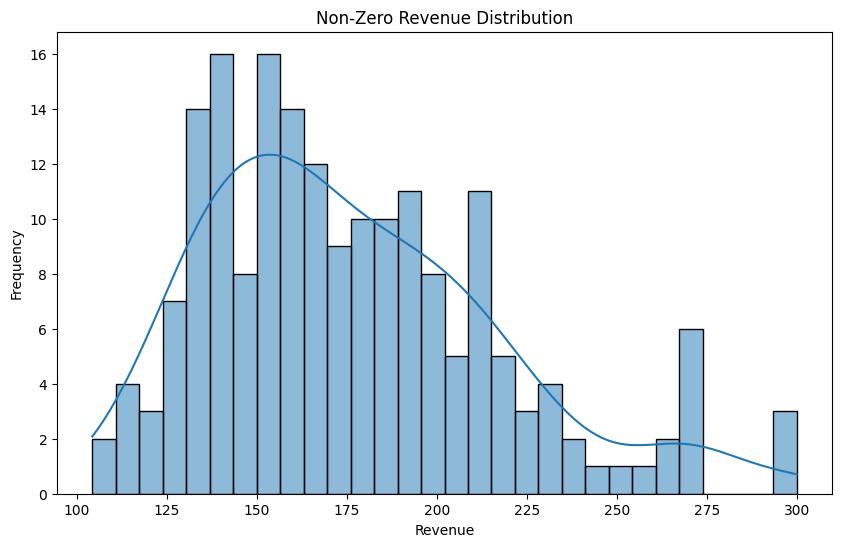

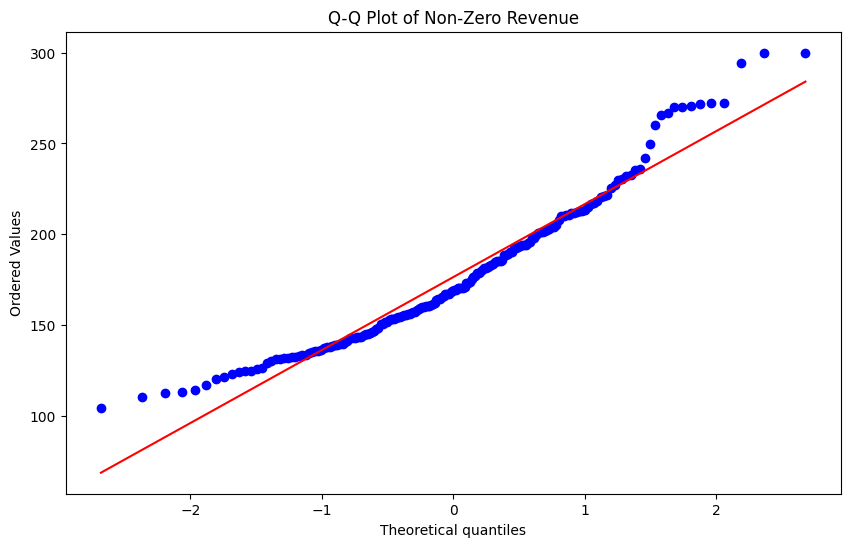

In [28]:
# Plot histogram for non-zero revenue
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_revenue_df['Revenue'], kde=True, bins=30)
plt.title('Non-Zero Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot for non-zero revenue
plt.figure(figsize=(10, 6))
stats.probplot(non_zero_revenue_df['Revenue'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Non-Zero Revenue')
plt.show()

The above visuals look like that the revenue are normally distributed, but it also seems a bit skewed. To make sure, let's check with Shapiro-Wilk test.

**Shapiro-Wilk test for Normality**

In [29]:
from scipy.stats import shapiro
shapiro_test = shapiro(non_zero_revenue_df['Revenue'])
print(f'Shapiro-Wilk test: W={shapiro_test[0]}, p-value={shapiro_test[1]}')
if shapiro_test[1] > 0.05:
    print('Revenue data is normally distributed.')
else:
    print('Non-zero revenue data is not normally distributed.')

Shapiro-Wilk test: W=0.9479917437178282, p-value=2.3704612265671997e-06
Non-zero revenue data is not normally distributed.


The Shapiro-Wilk test indicates the non-zero revenue data is not normally distributed, and the Q-Q plot shows some deviation from normality, particularly in the tails, it suggests that the data is slightly skewed. 

In such cases, a log transformation can often help to normalize the data. Let's try!

**Log transformation**

In [30]:
# Apply log transformation to non-zero revenue
non_zero_revenue_df.loc[:, 'Log_Revenue'] = np.log(non_zero_revenue_df['Revenue'])

C:\Users\USER\AppData\Local\Temp\ipykernel_4584\734754530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_zero_revenue_df.loc[:, 'Log_Revenue'] = np.log(non_zero_revenue_df['Revenue'])


Let's recheck normality agian.

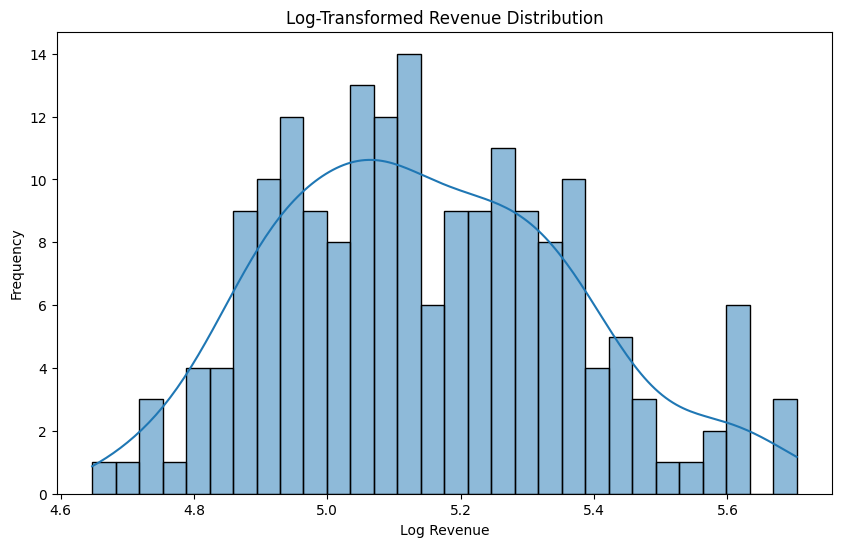

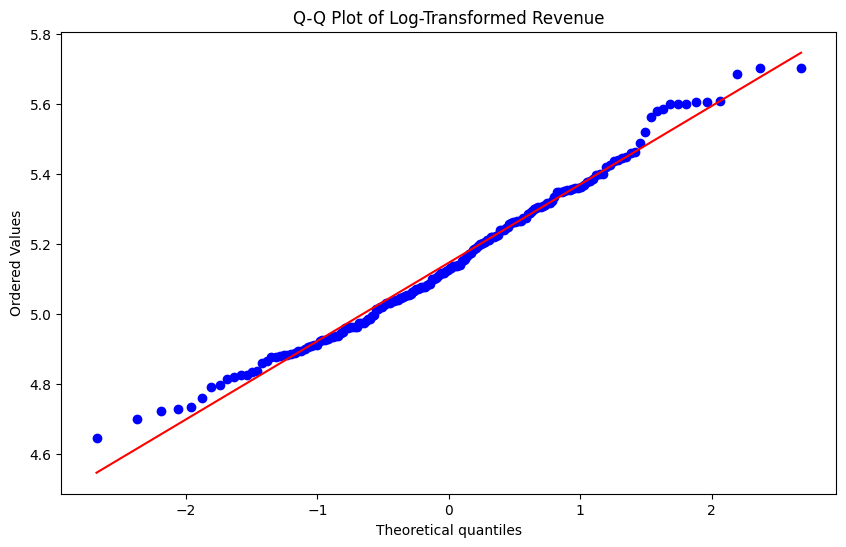

Shapiro-Wilk test (Log Revenue): W=0.985888522197482, p-value=0.05658724292406422
Log-transformed revenue data is normally distributed.


In [31]:

# Plot histogram for log-transformed revenue
plt.figure(figsize=(10, 6))
sns.histplot(non_zero_revenue_df['Log_Revenue'], kde=True, bins=30)
plt.title('Log-Transformed Revenue Distribution')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')
plt.show()

# Plot Q-Q plot for log-transformed revenue
plt.figure(figsize=(10, 6))
stats.probplot(non_zero_revenue_df['Log_Revenue'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Revenue')
plt.show()

# Shapiro-Wilk test for log-transformed revenue
shapiro_test_log = shapiro(non_zero_revenue_df['Log_Revenue'])
print(f'Shapiro-Wilk test (Log Revenue): W={shapiro_test_log[0]}, p-value={shapiro_test_log[1]}')
if shapiro_test_log[1] > 0.05:
    print('Log-transformed revenue data is normally distributed.')
else:
    print('Log-transformed revenue data is not normally distributed.')


Now the data is normally distributed. We are ready to go next step.

##### **9.2 Regression Analysis**

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit the linear regression model
linear_model = smf.ols('Log_Revenue ~ Previous_Engagement + C(Segment) + C(Device_Type) + C(Location) + C(Day_Type) + C(Time_Period)', data=non_zero_revenue_df).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Log_Revenue   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     2.521
Date:                Fri, 27 Sep 2024   Prob (F-statistic):            0.00213
Time:                        12:31:42   Log-Likelihood:                 34.442
No. Observations:                 188   AIC:                            -36.88
Df Residuals:                     172   BIC:                             14.90
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**Key Finding from OLS Regression**

The OLS regression results confirm that

- **Previous Engagement**: The coefficient for Previous Engagement is 0.0054 with a p-value < 0.001, indicating a significant positive relationship between previous engagement scores and revenue. This suggests that higher previous engagement scores are associated with increased revenue from emails.


**Additional Important Insights on Revenue**

Though the following facts are not directly related to Hypothesis 3, these insights will be valuable for business decisions:

1. **Day Type:**
   - **Weekend:** Significant positive effect on revenue (p = 0.035).
     - **Action:** Consider scheduling more emails on weekends to maximize revenue.

2. **Other Variables**
  - There are no significant impacts on Revenue.

-------------------

#### **10. Business Interpretation Summary and Recommendation**

ABC eCommerce conducted an A/B testing project to optimize its email marketing strategy. The primary objectives were to evaluate the impact of email subject lines, promotional content, and previous customer engagement on key performance metrics such as open rates, conversion rates, and revenue.

#### Key Findings

1. Impact of Subject Type on Open Rates

- **Finding:** Emails with 'Gender Highlighted Subject' lines have significantly higher open rates compared to 'Product Highlighted Subject' lines.

- **Action:** Prioritize 'Gender Highlighted Subject' lines in future email campaigns to maximize open rates.

2. Influence of Body Content Promotion Type on Conversion Rates

- **Finding:** 'Present Offer Promotion' content significantly outperforms 'Limited Time Discount' and 'Lucky Draw Promotion' in driving conversions.

- **Action:** Increase the use of 'Present Offer Promotion' content in emails to boost conversion rates.

3. Causal Effect of Previous Engagement Scores on Revenue

- **Finding:** Higher previous engagement scores are positively correlated with increased revenue from emails.

- **Action:** Focus on re-engaging customers with high previous engagement scores to maximize revenue.

#### Additional Insights

##### Customer Segments:

- **Returning Customers:** Lower open rates compared to new customers.
  - **Action:** Develop more engaging content tailored to returning customers.

- **VIP Customers:** Slightly higher open rates but lower purchase rates.
  - **Action:** Enhance engagement strategies and tailor offers for VIP customers.

##### Device Type:

- **Mobile Devices:** Higher open and purchase rates.
  - **Action:** Optimize email content for mobile devices to improve engagement and conversions.

##### Geographical Influence:

- **Top Locations:** Yangon, Mandalay, and Monywa generate the highest revenue.
  - **Action:** Focus marketing efforts on these top-performing locations while exploring strategies to increase sales in lower-revenue areas.

##### Time of Day:

- **Night:** Higher purchase rates.
  - **Action:** Schedule more emails to be sent at night to maximize purchase rates.

##### Day Type:

- **Weekend:** Positive effect on revenue.
  - **Action:** Consider scheduling more emails on weekends to maximize revenue.



#### Conclusion

By leveraging the insights from this A/B testing project, ABC eCommerce can make data-driven decisions to enhance its email marketing strategy. Prioritizing effective subject lines, promotional content, and targeting high-engagement customers will lead to improved open rates, conversion rates, and overall revenue. 

Additionally, optimizing for mobile devices and focusing on high-performing locations and times will further enhance the effectiveness of email campaigns.